<a href="https://colab.research.google.com/github/amitkumar981/Learn_RAG/blob/master/AgenticRAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from dotenv import load_dotenv

load_dotenv(override=True)

os.environ['OPENAI_API_kEY'] = os.getenv('OPENAI_API_KEY')

In [ ]:
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import FAISS
from langchain_openai import OpenAIEmbeddings
from langchain_text_splitters import RecursiveCharacterTextSplitter

e:\desktop backup\RAG\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
USER_AGENT environment variable not set, consider setting it to identify your requests.


In [ ]:
#define llm
from langchain.chat_models import init_chat_model
llm = init_chat_model(model='gpt-4o-mini',temperature=0.2)
llm

ChatOpenAI(profile={'max_input_tokens': 128000, 'max_output_tokens': 16384, 'image_inputs': True, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': False, 'tool_calling': True, 'structured_output': True, 'image_url_inputs': True, 'pdf_inputs': True, 'pdf_tool_message': True, 'image_tool_message': True, 'tool_choice': True}, client=<openai.resources.chat.completions.completions.Completions object at 0x000001EDF2FD23C0>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x000001EDF2FD2E40>, root_client=<openai.OpenAI object at 0x000001EDF2D074D0>, root_async_client=<openai.AsyncOpenAI object at 0x000001EDF2FD2BA0>, model_name='gpt-4o-mini', temperature=0.2, model_kwargs={}, openai_api_key=SecretStr('**********'), stream_usage=True)

In [ ]:
llm.invoke("Hii")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 9, 'total_tokens': 18, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_29330a9688', 'id': 'chatcmpl-Cpoi87ityff5SMlVgcUPk1LUK16jM', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019b498f-67e0-7563-9c26-f1bcd219301c-0', usage_metadata={'input_tokens': 9, 'output_tokens': 9, 'total_tokens': 18, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [ ]:
#document loading
urls=[
    "https://langchain-ai.github.io/langgraph/tutorials/introduction/",
    "https://langchain-ai.github.io/langgraph/tutorials/workflows/",
    "https://langchain-ai.github.io/langgraph/how-tos/map-reduce/"
]
docs = [WebBaseLoader(url).load() for url in urls]
docs


[[Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/introduction/', 'title': 'Redirecting...', 'language': 'en'}, page_content='\n\n\n\n\nRedirecting...\n\n\n\n\n\n\nRedirecting...\n\n\n')],
 [Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Redirecting...', 'language': 'en'}, page_content='\n\n\n\n\nRedirecting...\n\n\n\n\n\n\nRedirecting...\n\n\n')],
 [Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/how-tos/map-reduce/', 'title': 'Redirecting...', 'language': 'en'}, page_content='\n\n\n\n\nRedirecting...\n\n\n\n\n\n\nRedirecting...\n\n\n')]]

In [ ]:
docs_list = [item for sublist in docs for item in sublist]
docs_list

[Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/introduction/', 'title': 'Redirecting...', 'language': 'en'}, page_content='\n\n\n\n\nRedirecting...\n\n\n\n\n\n\nRedirecting...\n\n\n'),
 Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Redirecting...', 'language': 'en'}, page_content='\n\n\n\n\nRedirecting...\n\n\n\n\n\n\nRedirecting...\n\n\n'),
 Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/how-tos/map-reduce/', 'title': 'Redirecting...', 'language': 'en'}, page_content='\n\n\n\n\nRedirecting...\n\n\n\n\n\n\nRedirecting...\n\n\n')]

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size  = 1000,chunk_overlap = 100)
docs_split = text_splitter.split_documents(docs_list)

langgraph_vectorstore  = FAISS.from_documents(docs_split,OpenAIEmbeddings())

langgraph_retriever =langgraph_vectorstore.as_retriever(search_type="similarity", search_kwargs={"k": 3})

In [ ]:
from langchain_core.tools.retriever import create_retriever_tool
langgraph_retriever_tool  = create_retriever_tool(
    name='langgraph_retriever_tool',
    description="search and run langgraph information",
    retriever=langgraph_retriever
)
langgraph_retriever_tool

StructuredTool(name='langgraph_retriever_tool', description='search and run langgraph information', args_schema=<class 'langchain_core.tools.retriever.RetrieverInput'>, func=<function create_retriever_tool.<locals>.func at 0x000001EDF29F1BC0>, coroutine=<function create_retriever_tool.<locals>.afunc at 0x000001EDF375D580>)

In [ ]:
langchain_urls=[
    "https://python.langchain.com/docs/tutorials/",
    "https://python.langchain.com/docs/tutorials/chatbot/",
    "https://python.langchain.com/docs/tutorials/qa_chat_history/"
]
langchain_docs = [WebBaseLoader(url).load() for url in langchain_urls]
langchain_docs

[[Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/', 'title': 'Build a RAG agent with LangChain - Docs by LangChain', 'language': 'en'}, page_content='Build a RAG agent with LangChain - Docs by LangChainSkip to main contentDocs by LangChain home pageLangChain + LangGraphSearch...⌘KAsk AIGitHubTry LangSmithTry LangSmithSearch...NavigationLangChainBuild a RAG agent with LangChainLangChainLangGraphDeep AgentsIntegrationsLearnReferenceContributePythonLearnTutorialsLangChainSemantic searchRAG agentSQL agentVoice agentMulti-agentLangGraphConceptual overviewsComponent architectureMemoryContextGraph APIFunctional APIAdditional resourcesLangChain AcademyCase studiesGet helpOn this pageOverviewConceptsPreviewSetupInstallationLangSmithComponents1. IndexingLoading documentsSplitting documentsStoring documents2. Retrieval and GenerationRAG agentsRAG chainsNext stepsTutorialsLangChainBuild a RAG agent with LangChainCopy pageCopy page\u200bOverview\nOne of the most powerful 

In [ ]:
langchain_docs_list = [item for sublist in langchain_docs for item in sublist]
langchain_docs_list

[Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/', 'title': 'Build a RAG agent with LangChain - Docs by LangChain', 'language': 'en'}, page_content='Build a RAG agent with LangChain - Docs by LangChainSkip to main contentDocs by LangChain home pageLangChain + LangGraphSearch...⌘KAsk AIGitHubTry LangSmithTry LangSmithSearch...NavigationLangChainBuild a RAG agent with LangChainLangChainLangGraphDeep AgentsIntegrationsLearnReferenceContributePythonLearnTutorialsLangChainSemantic searchRAG agentSQL agentVoice agentMulti-agentLangGraphConceptual overviewsComponent architectureMemoryContextGraph APIFunctional APIAdditional resourcesLangChain AcademyCase studiesGet helpOn this pageOverviewConceptsPreviewSetupInstallationLangSmithComponents1. IndexingLoading documentsSplitting documentsStoring documents2. Retrieval and GenerationRAG agentsRAG chainsNext stepsTutorialsLangChainBuild a RAG agent with LangChainCopy pageCopy page\u200bOverview\nOne of the most powerful a

In [ ]:
langgchain_split_docs = text_splitter.split_documents(langchain_docs_list)

langchain_vectorstore = FAISS.from_documents(langgchain_split_docs,OpenAIEmbeddings())

langchain_retriever = langchain_vectorstore.as_retriever(search_type="similarity", search_kwargs={"k": 3})

langchain_retriever_tool =  create_retriever_tool(
    name = 'lannchain_retrever_tool',
    description='search and run langchain information',
    retriever=langchain_retriever
)
langchain_retriever_tool

StructuredTool(name='lannchain_retrever_tool', description='search and run langchain information', args_schema=<class 'langchain_core.tools.retriever.RetrieverInput'>, func=<function create_retriever_tool.<locals>.func at 0x000001EE291CD080>, coroutine=<function create_retriever_tool.<locals>.afunc at 0x000001EE291CCEA0>)

In [ ]:
tools = [langgraph_retriever_tool,langchain_retriever_tool]

In [ ]:
#create state
from typing import Annotated,Literal,Sequence
from typing_extensions import TypedDict
from pydantic import BaseModel,Field
from langchain_core.messages import HumanMessage,BaseMessage
from langgraph.graph.message import add_messages
class AgentState(TypedDict):
    messages:Annotated[Sequence[BaseMessage],add_messages]

In [ ]:
#crate agent node
def agent(state):
    """
    invoke the agent to generate response based on current state.
    args:
        state(message):current state
    returns:
        dict: the updated state with the agent response appended to messages.
    """
    print('CALLING AGENT.....')
    messages  = state['messages']
    model = llm.bind_tools(tools)
    response = model.invoke(messages)
    return {'messages':[response]}


In [ ]:
from langchain_core.prompts import PromptTemplate
def grade_documents(state) -> Literal['generate','rewrite']:
    """determine weather the retrieved documents are sufficient to answer the user query.
    args:
        state(messages): the current state
    returns:
        str: 'generate' or 'rewrite'
    """
    print('GRADING DOCUMENTS....')

    class grade(BaseModel):
        "Binary score for grading documents"
        score: str = Field(description="Relevance score 'yes' or 'no'")

    llm_with_tools = llm.with_structured_output(grade)

    # Prompt
    prompt = PromptTemplate(
        template="""You are a grader assessing relevance of a retrieved document to a user question. \n
        Here is the retrieved document: \n\n {context} \n\n
        Here is the user question: {question} \n
        If the document contains keyword(s) or semantic meaning related to the user question, grade it as relevant. \n
        Give a binary score 'yes' or 'no' score to indicate whether the document is relevant to the question.""",
        input_variables=["context", "question"],
    )

    chain = prompt | llm_with_tools
    messages = state['messages']
    last_message = messages[-1]

    question = messages[0].content
    docs = last_message.content

    scored_results = chain.invoke({'question':question,'context':docs})

    score  = scored_results.score

    if score =='yes':
        print("DOCUMENTS ARE RELEVANT")
        return 'generate'
    else:
        print("DOCUMENTS ARE NOT RELEVANT")
        return 'rewrite'

In [ ]:
from langchain_core.output_parsers import StrOutputParser
from langchain_classic import hub
def generate_response(state):
    """generate answer

    Args:
        state(messages): the current state

    Returns:
        str: the generated response
    """
    print(('GENERATING RESPONSE....'))
    message = state['messages']
    question = message[0].content
    last_message = message[-1]
    docs = last_message.Content

    prompt = hub.pull("rlm/rag-prompt")

    def format_docs(docs):
        return "\n\n".join(doc.page_content for doc in docs)

    rag_chain = prompt | llm | StrOutputParser()
    response = rag_chain.invoke({
        "question":question,
        "context":format_docs(docs)
    })
    return {'messages':[response]}

In [ ]:
def rewrite(state):
    """rewrite the user query to improve document retrieval

    Args:
        state (messages) : the updated state
    return:
        str: the rewritten query
    """
    print('REWRITING QUERY....')
    messages = state['messages']
    question = messages[0].content

    msg = [
        HumanMessage(
            content=f""" \n
    Look at the input and try to reason about the underlying semantic intent / meaning. \n
    Here is the initial question:
    \n ------- \n
    {question}
    \n ------- \n
    Formulate an improved question: """,
        )
    ]

    response  = llm.invoke(msg)
    return {'messages':[response]}


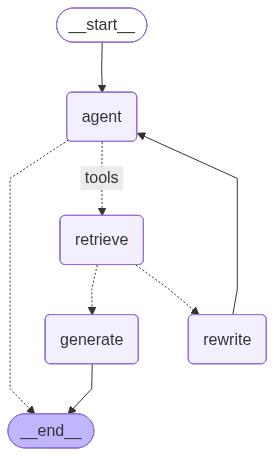

In [ ]:
from langgraph.graph import END, StateGraph, START
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

# Define a new graph
workflow = StateGraph(AgentState)

# Define the nodes we will cycle between
workflow.add_node("agent", agent)  # agent
retrieve = ToolNode(tools)
workflow.add_node("retrieve", retrieve)  # retrieval
workflow.add_node("rewrite", rewrite)  # Re-writing the question
workflow.add_node(
    "generate", generate_response
)  # Generating a response after we know the documents are relevant
# Call agent node to decide to retrieve or not
workflow.add_edge(START, "agent")

# Decide whether to retrieve
workflow.add_conditional_edges(
    "agent",
    # Assess agent decision
    tools_condition,
    {
        # Translate the condition outputs to nodes in our graph
        "tools": "retrieve",
        END: END,
    },
)

# Edges taken after the `action` node is called.
workflow.add_conditional_edges(
    "retrieve",
    # Assess agent decision
    grade_documents,
)
workflow.add_edge("generate", END)
workflow.add_edge("rewrite", "agent")

# Compile
graph = workflow.compile()
from IPython.display import Image, display
display(Image(graph.get_graph(xray=True).draw_mermaid_png()))

In [ ]:
graph.invoke({"messages":"What is Langchain?"})


CALLING AGENT.....
GRADING DOCUMENTS....
DOCUMENTS ARE NOT RELEVANT
REWRITING QUERY....
CALLING AGENT.....
GRADING DOCUMENTS....
DOCUMENTS ARE NOT RELEVANT
REWRITING QUERY....
CALLING AGENT.....


{'messages': [HumanMessage(content='What is Langchain?', additional_kwargs={}, response_metadata={}, id='c5b3c9a9-e0ee-464e-a8af-49cf2789c4d1'),
  AIMessage(content='', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 23, 'prompt_tokens': 97, 'total_tokens': 120, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_29330a9688', 'id': 'chatcmpl-CpoizKnwqbeFqSF3eqJselktvQvRP', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='lc_run--019b4990-39c1-73e2-97e9-1d3e5a1579e8-0', tool_calls=[{'name': 'lannchain_retrever_tool', 'args': {'query': 'What is Langchain?'}, 'id': 'call_hVONYScQECPmkVFTq8OEs5X4', 'type': 'tool_call'}], usage_metadata={'input_tokens': 97, 'output_tokens

In [ ]:
graph.invoke({"messages":"What is Machine learning?"})

CALLING AGENT.....


{'messages': [HumanMessage(content='What is Machine learning?', additional_kwargs={}, response_metadata={}, id='7fc48bdc-ef8f-4409-8ae2-ebf5c633c8aa'),
  AIMessage(content="Machine learning is a subset of artificial intelligence (AI) that focuses on the development of algorithms and statistical models that enable computers to perform specific tasks without explicit instructions. Instead of being programmed to perform a task, machine learning systems learn from data, identify patterns, and make decisions based on the information they have processed.\n\nKey concepts in machine learning include:\n\n1. **Data**: The foundation of machine learning; algorithms learn from data to make predictions or decisions.\n2. **Models**: Mathematical representations of the relationships within the data. Models are trained using data to recognize patterns.\n3. **Training**: The process of feeding data into a machine learning algorithm to help it learn and improve its performance.\n4. **Testing**: Evaluati